# Generative Adversarial Networks

__Yann LeCun__, Director of AI Research at Facebook and Professor at NYU, defined __Generative Adversarial Networks (GANs)__ as [__the most interesting idea in the last 10 years in ML__](https://www.quora.com/What-are-some-recent-and-potentially-upcoming-breakthroughs-in-deep-learning). 

_The idea is to simultaneously train two neural nets. The first one, called the __Discriminator__ — let’s denote it D(Y) — takes an input (e.g. an image) and outputs a scalar that indicates whether the image Y looks “natural” or not. In one instance of adversarial training, D(Y) can be seem as some sort of energy function that takes a low value (e.g. close to 0) when Y is a real sample (e.g. an image from a database) and a positive value when it is not (e.g. if it’s a noisy or strange looking image). The second network is called the __Generator__, denoted G(Z), where Z is generally a vector randomly sampled in a simple distribution (e.g. Gaussian). The role of the generator is to produce images so as to train the D(Y) function to take the right shape (low values for real images, higher values for everything else). During training D is shown a real image, and adjusts its parameter to make its output lower. Then D is shown an image produced from G and adjusts its parameters to make its output D(G(Z)) larger (following the gradient of some objective predefined function). But G(Z) will train itself to produce images so as to fool D into thinking they are real. It does this by getting the gradient of D with respect to Y for each sample it produces. In other words, it’s trying to minimize the output of D while D is trying to maximize it. Hence the name adversarial training._

GANs are able to learn how to reproduce synthetic data that looks real. For instance, computers can learn how to paint and create realistic images. The idea was originally proposed by [__Ian Goodfellow__](https://arxiv.org/abs/1701.00160). 

__WaveNet__ is a deep generative network proposed by __Google DeepMind__ to teach computers how to reproduce human voices and musical instruments with impressive quality. 

## Theoretical summary

[NIPS 2016 Tutorial: Generative Adversarial Networks, by I. Goodfellow, 2016](https://arxiv.org/pdf/1701.00160.pdf)

To simplify the discussion somewhat, we will focus on generative models that
work via the principle of __maximum likelihood__. Not every generative model
uses maximum likelihood. Some generative models do not use maximum likelihood
by default, but can be made to do so (GANs fall into this category). 

The basic idea of __maximum likelihood__ is to define a model that provides an
__estimate of the probability distribution of $p(x^{(i)},\theta)$, parameterized by parameters θ__ with respect to a training data $\{x^{(1)},...,x^{(m)}\}$. The principle of maximum likelihood simply says to choose the parameters
for the model that maximize the likelihood of the training data. This is easiest
to do in __log space__, where we have a sum rather than a product over examples.
This sum simplifies the algebraic expressions for the derivatives of the likelihood
with respect to the models, and when implemented on a digital computer, is
less prone to numerical problems, such as underflow resulting from multiplying
together several very small probabilities.

$$\theta^*=argmax \big( \prod_{n=1}^{m}p(x^{(i)},\theta) \big) = argmax \quad log \big( \prod_{n=1}^{m}p(x^{(i)},\theta) \big) = argmax \quad \sum_{n=1}^{m} log \big( p(x^{(i)},\theta) \big)$$


We can also think of maximum likelihood estimation as minimizing the [KL divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the data generating distribution and the model:

$$\theta^*=argmin \quad  D_{KL} \big( p_{data}(x) || p_{model}(x;\theta) \big)$$



If we were able to do this precisely, then if $p_{data}$ lies within the family of distributions
$p_{model}(x; \ theta)$, the model would recover $p_{data}$ exactly. In practice, we do
not have access to $p_{data}$ itself, but only to a training set consisting of m samples
from pdata. We uses these to define $p_{data}$, an empirical distribution that
places mass only on exactly those m points, approximating pdata. Minimizing
the KL divergence between $p_{data}$ and $p_{model}(x; \theta)$  is exactly equivalent to maximizing
the log-likelihood of the training set. 

### A taxonomy of deep generative models

If we restrict our attention to deep generative models that work by maximizing
the likelihood, we can compare several models by contrasting the ways that
they compute either the likelihood and its gradients, or approximations to these
quantities. As mentioned earlier, many of these models are often used with
principles other than maximum likelihood, but we can examine the maximum
likelihood variant of each of them in order to reduce the amount of distracting
differences between the methods. Following this approach, we construct
the taxonomy shown in the following figure. 

<img src="images/GAN.JPG" />

#### Explicit density models
In the left branch of the taxonomy shown there are models that define
an explicit density function $p_{model}(x;\theta)$. For these models, maxmimization of
the likelihood is straightforward; we simply plug the model’s definition of the
density function into the expression for the likelihood, and follow the gradient
uphill.

##### Tractable explicit models

In the leftmost leaf of the taxonomic tree of the figure are the models that define an
explicit density function that is computationally tractable. There are currently
two popular approaches to tractable explicit density models:  

1. __Fully visible belief networks__. Fully visible belief networks (Frey et al.,
1996; Frey, 1998) or __FVBNs__ are models that use the chain rule of probability
to decompose a probability distribution over an n-dimensional vector x into a
product of one-dimensional probability distributions: $p_{model}(x)=\prod_{i=1}^{n}p(x_i|x_1,x_2,...,x_{i-1})$. 
They form the basis for sophisticated __generative models__ from __DeepMind__, such as __WaveNet__
(Oord et al., 2016). WaveNet is able to generate realistic human speech. The
main drawback of FVBNs is that samples must be generated one entry at a
time: first x1, then x2, etc., so the __cost of generating a sample is O(n)__.
2. __Nonlinear independent components analysis (ICA)__ Another family of deep
generative models with explicit density functions is based on defining continuous,
nonlinear transformations between two different spaces. The main drawback to nonlinear ICA models is that
they impose __restrictions on the choice of the function g__. In particular, the
invertibility requirement means that the latent variables z must have the same
dimensionality as x. GANs were designed to impose very few requirements on
g, and, in particular, admit the use of z with larger dimension than x.

#### Explicit models requiring approximation

To avoid some of the disadvantages imposed by the design requirements of
models with tractable density functions, other models have been developed that
__still provide an explicit density function but use one that is intractable, requiring
the use of approximations to maximize the likelihood__. These fall roughly into
two categories: those using __deterministic approximations__, which almost always
means variational methods, and those using __stochastic approximations__, meaning
__Markov chain Monte Carlo method__.

#### Variational approximations 

__Variational methods__ define a lower bound $L(x;\theta) \leq log(p_{model}(x;\theta))$

A learning algorithm that maximizes L is guaranteed to obtain at least as high
a value of the log-likelihood as it does of L. For many families of models, it
is possible to define an L that is computationally tractable even when the loglikelihood
is not. Currently, the most popular approach to variational learning
in deep generative models is the __variational autoencoder__ (Kingma, 2013;
Rezende et al., 2014) or __VAE__. The main drawback of variational
methods is that, when __too weak of an approximate posterior distribution or
too weak of a prior distribution is used__, even with a perfect optimization algorithm
and infinite training data, the gap between L and the true likelihood
can result in $p_{model}$ learning something other than the true $p_{data}$. 

#### Markov chain approximations 
Most deep learning algorithms make use of
some form of stochastic approximation, at the very least in the form of using a
small number of randomly selected training examples to form a minibatch used
to minimize the expected loss. Usually, sampling-based approximations work
reasonably well as long as a fair sample can be generated quickly (e.g. selecting
a single example from the training set is a cheap operation) and as long as the
variance across samples is not too high. Some models require the generation of
more expensive samples, using Markov chain techniques.Unfortunately, the convergence can be very slow, and there is
no clear way to test whether the chain has converged, so in practice one often
uses x too early, before it has truly converged to be a fair sample from $p_{model}$.

### Implicit density models

Some models can be trained without even needing to explicitly define a density
functions. These models instead offer a way to train the model while interacting
only indirectly with $p_{model}$, usually by sampling from it. These constitute the
second branch, on the right side, of our taxonomy of generative models depicted
in above figure.
Some of these implicit models based on drawing samples from $p_{model}$ define 
a Markov chain transition operator that must be run several times to obtain
a sample from the model. From this family, the primary example is the
generative stochastic network (Bengio et al., 2014). 

__GANs were designed to avoid these problems.
Finally, the rightmost leaf of our taxonomic tree is the family of implicit
models that can generate a sample in a single step. At the time of their introduction,
GANs were the only notable member of this family, but since then they
have been joined by additional models based on kernelized moment matching__
(Li et al., 2015; Dziugaite et al., 2015).

### Comparing GANs to other generative models

In summary, GANs were designed to avoid many disadvantages associated with
other generative models:

* __They can generate samples in parallel__, instead of using runtime proportional
to the dimensionality of x. This is an advantage relative to __FVBNs__.
* __The design of the generator function has very few restrictions__. This is
an advantage relative to __Boltzmann machines__, for which few probability
distributions admit tractable Markov chain sampling, and relative to nonlinear
ICA, for which the generator must be invertible and the latent code
z must have the same dimension as the samples x.
* __No Markov chains are needed__. This is an advantage relative to Boltzmann
machines and GSNs.
* __No variational bound is needed__, and specific model families usable within
the GAN framework are already known to be universal approximators, so
GANs are already known to be asymptotically consistent. Some VAEs are
conjectured to be asymptotically consistent, but this is not yet proven.
* __GANs are subjectively regarded as producing better samples than other
methods__.

At the same time, GANs have taken on a __new disadvantage: training them requires
finding the Nash equilibrium of a game, which is a more difficult problem
than optimizing an objective function__.

### The GAN framework

The basic idea of GANs is to set up a __game between two players__. One of them is
called the generator. The __generator__ creates samples that are intended to come
from the same distribution as the training data. The other player is the __discriminator__.
The discriminator examines samples to determine whether they are real or fake. 

The __discriminator__ learns using __traditional supervised learning
techniques, dividing inputs into two classes (real or fake)__. 

The __generator__ is trained to fool the discriminator. We can think of the generator as being
like a __counterfeiter, trying to make fake money__, and the __discriminator__ as being
like __police__, trying to allow legitimate money and catch counterfeit money. To
succeed in this game, the counterfeiter must learn to make money that is indistinguishable
from genuine money, and the generator network must learn to
create samples that are drawn from the same distribution as the training data.

Both players have cost functions that are defined in terms of both players’
parameters. The __discriminator__ wishes to __minimize__ $J^{D}(\theta^{(G)},\theta^{(D)})$. and
must do so while __controlling only $\theta^{(D)}$__. The __generator__ wishes to __minimize__
$J^{G}(\theta^{(G)},\theta^{(D)})$ __controlling only $\theta^{(G)}$__. Because each
player’s cost depends on the other player’s parameters, but each player cannot
control the other player’s parameters, this scenario is most straightforward to
describe as a __game rather than as an optimization problem__. The solution to an
optimization problem is a (local) minimum, a point in parameter space where all
neighboring points have greater or equal cost. __The solution to a game is a Nash
equilibrium__. Here, we use the terminology of local differential Nash equilibria
(Ratliff et al., 2013). In this context, a __Nash equilibrium is a tuple $(\theta^{(G)},\theta^{(D)})$ 
that is a local minimum of $J^{(D)}$ with respect to $\theta^{(D)}$ 
and a local minimum of $J^{(G)}$ with respect to $\theta^{(G)}$__.




....

## Some GAN applications

We have seen that the generator learns how to forge data. This means that it learns how to create new synthetic data, which is created by the network, that looks real and like it was created by humans. Here some recent applications: 

* StackGAN: Text to Photo-Realistic Image Synthesis with Stacked Generative Adversarial Networks, by Han Zhang, Tao Xu, Hongsheng Li, Shaoting Zhang, Xiaolei Huang, Xiaogang Wang, and Dimitris Metaxas 
(the code is available online at: https://github.com/hanzhanggit/StackGAN). Here, a GAN has been used to synthesize forged images starting from a text description. The results are impressive. The first column is the real image in the test set, and the rest of the columns contain images generated from the same text description by Stage-I and Stage-II of StackGAN. More examples are available on YouTube (https://www.youtube.com/watch?v=SuRyL5vhCIM&feature=youtu.be). 
* Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks, by A. Radford, L. Metz, and S. Chintala, arXiv: 1511.06434, 2015. In this case, there is a combination of GAN and ConvNets used for the generator and the discriminator networks. At the beginning, the generator creates nothing understandable, but after a few iterations, synthetic forged numbers are progressively clearer and clearer. 

## Deep convolutional generative adversarial networks

The deep convolutional generative adversarial networks (__DCGAN__) are introduced in the paper: _Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks_, by A. Radford, L. Metz, and S. Chintala, arXiv: 1511.06434, 2015. The generator uses a 100-dimensional, uniform distribution space, Z, which is then projected into a smaller space by a series of vis-a-vis convolution operations. 
A DCGAN generator can be described by the following Keras code; it is also described by one implementation, available at: https://github.com/jacobgil/keras-dcgan:

### DCGAN with Keras on MNIST 

From https://github.com/Zackory/Keras-MNIST-GAN ported to Python 3. 

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
#from keras import initializers
from keras import initializers

K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

# Function for initializing network weights
def initNormal():
    return initializers.RandomNormal()

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, init=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Convolution2D(64, 5, 5, border_mode='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Convolution2D(1, 5, 5, border_mode='same', activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

# Discriminator
discriminator = Sequential()
discriminator.add(Convolution2D(64, 5, 5, border_mode='same', subsample=(2, 2), input_shape=(1, 28, 28), init=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Convolution2D(128, 5, 5, border_mode='same', subsample=(2, 2)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(input=ganInput, output=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/dcgan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/dcgan_generated_image_epoch_%d.png' % epoch)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('models/dcgan_generator_epoch_%d.h5' % epoch)
    discriminator.save('models/dcgan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] / batchSize
    print('Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(int(batchCount))):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

Using TensorFlow backend.
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6272, kernel_initializer=<keras.ini..., input_dim=100)`
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), activation="tanh", padding="same")`
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=(1, 28, 28..., kernel_initializer=<keras.ini...)`
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel_launcher.py

Let's run a couple of epochs just to show the deep need of GPUs in running this code.  

In [2]:
train(2, 128)

Epochs: 2
Batch size: 128
Batches per epoch: 468.75
--------------- Epoch 1 ---------------


100%|██████████| 468/468 [1:00:15<00:00,  8.30s/it]


--------------- Epoch 2 ---------------


100%|██████████| 468/468 [1:01:01<00:00,  8.16s/it]


Running ~50 epochs you should obtain loss functions for generators and discriminator like this:

<img src='images/dcgan_loss_epoch_50.png' />

__Is this a Nash equilibrium?__ I think John Nash would be the first one to be surpised.  

#### Generated images - Epoch 1

<img src='images/dcgan_generated_image_epoch_1.png' />

#### Generated images - Epoch 30

<img src='images/dcgan_generated_image_epoch_30.png' />

#### Generated images - Epoch 50

<img src='images/dcgan_generated_image_epoch_50.png' />

### My implementation 

TODO

### keras-adversarial

From https://github.com/bstriner/keras-adversarial with some fixes, i.e. 

* Dense(hidden_dim / 4,.. does not work --> need to turn into an integer, i.e. Dense(int(hidden_dim / 4) ... 
* class AdversarialModel is overwritten --> need to copy from keras_adversarial
* logs directory needs to be created manually (only on Windows)
                                                                                    

In [19]:
###
import itertools

import numpy as np
from keras import backend as K
from keras import optimizers
from keras.models import Model

from keras_adversarial.adversarial_utils import fix_names, merge_updates

class AdversarialModel(Model):
    """
    Adversarial training for multi-player games.
    Given a base model with n targets and k players, create a model with n*k targets.
    Each player optimizes loss on that player's targets.
    """

    def __init__(self, player_params, base_model=None, player_models=None, player_names=None):
        """
        Initialize adversarial model. Specify base_model or player_models, not both.
        :param player_params: list of player parameters for each player (shared variables)
        :param base_model: base model will be duplicated for each player to create player models
        :param player_models: model for each player
        :param player_names: names of each player (optional)
        """

        assert (len(player_params) > 0)
        self.player_params = player_params
        self.player_count = len(self.player_params)
        if player_names is None:
            player_names = ["player_{}".format(i) for i in range(self.player_count)]
        assert (len(player_names) == self.player_count)
        self.player_names = player_names

        self.generator_optimizer = None
        self.discriminator_optimizer = None
        self.loss = None
        self.total_loss = None
        self.optimizer = None
        self._function_kwargs = None
        if base_model is None and player_models is None:
            raise ValueError("Please specify either base_model or player_models")
        if base_model is not None and player_models is not None:
            raise ValueError("Specify base_model or player_models, not both")
        if base_model is not None:
            self.layers = []
            for i in range(self.player_count):
                # duplicate base model
                model = Model(base_model.inputs,
                              fix_names(base_model(base_model.inputs), base_model.output_names))
                # add model to list
                self.layers.append(model)
        if player_models is not None:
            assert (len(player_models) == self.player_count)
            self.layers = player_models

    def adversarial_compile(self, adversarial_optimizer, player_optimizers, loss, compile_kwargs={},
                            **kwargs):
        """
        Configures the learning process.
        :param adversarial_optimizer: instance of AdversarialOptimizer
        :param player_optimizers: list of optimizers for each player
        :param loss: loss function or function name
        :param kwargs: additional arguments to function compilation
        :return:
        """
        self._function_kwargs = kwargs
        self.adversarial_optimizer = adversarial_optimizer
        assert (len(player_optimizers) == self.player_count)

        self.optimizers = [optimizers.get(optimizer) for optimizer in player_optimizers]
        self.loss = loss
        self.optimizer = None

        # Build player models
        for opt, model in zip(self.optimizers, self.layers):
            model.compile(opt, loss=self.loss, **compile_kwargs)

        self.train_function = None
        self.test_function = None

        # Inputs are same for each model
        def filter_inputs(inputs):
            return inputs

        self.internal_input_shapes = filter_inputs(self.layers[0].internal_input_shapes)
        self.input_names = filter_inputs(self.layers[0].input_names)
        self.inputs = filter_inputs(self.layers[0].inputs)

        # Outputs are concatenated player models
        models = self.layers

        def collect(f):
            return list(itertools.chain.from_iterable(f(m) for m in models))

        self.internal_output_shapes = collect(lambda m: m.internal_output_shapes)
        self.loss_functions = collect(lambda m: m.loss_functions)

        self.targets = collect(lambda m: m.targets)
        self.outputs = collect(lambda m: m.outputs)
        self.sample_weights = collect(lambda m: m.sample_weights)
        self.sample_weight_modes = collect(lambda m: m.sample_weight_modes)
        # for each target, output name is {player}_{target}
        self.output_names = []
        for i in range(self.player_count):
            for name in models[i].output_names:
                self.output_names.append("{}_{}".format(self.player_names[i], name))
        # for each metric, metric name is {player}_{metric}
        self.metrics_names = ["loss"]
        for i in range(self.player_count):
            for name in models[i].metrics_names:
                self.metrics_names.append("{}_{}".format(self.player_names[i], name))

        # total loss is sum of losses
        self.total_loss = np.float32(0)
        for model in models:
            self.total_loss += model.total_loss

        # Keras-2
        self._feed_loss_fns = self.loss_functions
        self._feed_inputs = self.inputs
        self._feed_input_names = self.input_names
        self._feed_input_shapes = self.internal_input_shapes
        self._feed_outputs = self.outputs
        self._feed_output_names = self.output_names
        self._feed_output_shapes = self.internal_output_shapes
        self._feed_sample_weights = self.sample_weights
        self._feed_sample_weight_modes = self.sample_weight_modes

    @property
    def constraints(self):
        return list(itertools.chain.from_iterable(model.constraints for model in self.layers))

    @property
    def updates(self):
        return merge_updates(list(itertools.chain.from_iterable(model.updates for model in self.layers)))

    @property
    def regularizers(self):
        return list(itertools.chain.from_iterable(model.regularizers for model in self.layers))

    def _make_train_function(self):
        if not hasattr(self, 'train_function'):
            raise Exception('You must compile your model before using it.')
        if self.train_function is None:
            inputs = self.inputs + self.targets + self.sample_weights
            if self.uses_learning_phase and not isinstance(K.learning_phase(), int):
                inputs += [K.learning_phase()]
            outputs = [self.total_loss]
            outputs += list(itertools.chain.from_iterable(
                [model.total_loss] + model.metrics_tensors
                for model in self.layers))

            # returns loss and metrics. Updates weights at each call.
            self.train_function = self.adversarial_optimizer.make_train_function(inputs, outputs,
                                                                                 [model.total_loss for model in
                                                                                  self.layers],
                                                                                 self.player_params,
                                                                                 self.optimizers,
                                                                                 [model.constraints for model in
                                                                                  self.layers],
                                                                                 self.updates,
                                                                                 self._function_kwargs)

    def _make_test_function(self):
        if not hasattr(self, 'test_function'):
            raise Exception('You must compile your model before using it.')
        if self.test_function is None:
            inputs = self.inputs + self.targets + self.sample_weights
            if self.uses_learning_phase and not isinstance(K.learning_phase(), int):
                inputs += [K.learning_phase()]
            outputs = [self.total_loss]
            outputs += list(itertools.chain.from_iterable(
                [model.total_loss] + model.metrics_tensors
                for model in self.layers))
            self.test_function = K.function(inputs,
                                            outputs,
                                            updates=self.state_updates,
                                            **self._function_kwargs)
###
import matplotlib as mpl

# This line allows mpl to run with no DISPLAY defined
mpl.use('Agg')

import pandas as pd
import numpy as np
import os
from keras.layers import Reshape, Flatten, LeakyReLU, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras_adversarial.image_grid_callback import ImageGridCallback
#from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import simple_gan, gan_targets
from keras_adversarial import normal_latent_sampling, AdversarialOptimizerSimultaneous
from keras_adversarial.legacy import l1l2, Dense, fit
import keras.backend as K
from keras.models import Model


import numpy as np
from keras.datasets import mnist


def mnist_process(x):
    x = x.astype(np.float32) / 255.0
    return x


def mnist_data():
    (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
    return mnist_process(xtrain), mnist_process(xtest)


def model_generator(latent_dim, input_shape, hidden_dim=1024, reg=lambda: l1l2(1e-5, 1e-5)):
    return Sequential([
        Dense(int(hidden_dim / 4), name="generator_h1", input_dim=latent_dim, W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim / 2), name="generator_h2", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim), name="generator_h3", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(np.prod(input_shape), name="generator_x_flat", W_regularizer=reg()),
        Activation('sigmoid'),
        Reshape(input_shape, name="generator_x")],
        name="generator")


def model_discriminator(input_shape, hidden_dim=1024, reg=lambda: l1l2(1e-5, 1e-5), output_activation="sigmoid"):
    return Sequential([
        Flatten(name="discriminator_flatten", input_shape=input_shape),
        Dense(hidden_dim, name="discriminator_h1", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim / 2), name="discriminator_h2", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim / 4), name="discriminator_h3", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(1, name="discriminator_y", W_regularizer=reg()),
        Activation(output_activation)],
        name="discriminator")


def example_gan(adversarial_optimizer, path, opt_g, opt_d, nb_epoch, generator, discriminator, latent_dim,
                targets=gan_targets, loss='binary_crossentropy'):
    csvpath = os.path.join(path, "history.csv")
    if os.path.exists(csvpath):
        print("Already exists: {}".format(csvpath))
        return

    print("Training: {}".format(csvpath))
    # gan (x - > yfake, yreal), z generated on GPU
    gan = simple_gan(generator, discriminator, normal_latent_sampling((latent_dim,)))

    # print summary of models
    generator.summary()
    discriminator.summary()
    gan.summary()

    # build adversarial model
    model = AdversarialModel(base_model=gan,
                             player_params=[generator.trainable_weights, discriminator.trainable_weights],
                             player_names=["generator", "discriminator"])
    model.adversarial_compile(adversarial_optimizer=adversarial_optimizer,
                              player_optimizers=[opt_g, opt_d],
                              loss=loss)

    # create callback to generate images
    zsamples = np.random.normal(size=(10 * 10, latent_dim))

    def generator_sampler():
        return generator.predict(zsamples).reshape((10, 10, 28, 28))

    generator_cb = ImageGridCallback(os.path.join(path, "epoch-{:03d}.png"), generator_sampler)

    # train model
    xtrain, xtest = mnist_data()
    y = targets(xtrain.shape[0])
    ytest = targets(xtest.shape[0])
    callbacks = [generator_cb]
    if K.backend() == "tensorflow":
        callbacks.append(
            TensorBoard(log_dir=os.path.join(path, 'logs'), histogram_freq=0, write_graph=True, write_images=True))
    history = fit(model, x=xtrain, y=y, validation_data=(xtest, ytest), callbacks=callbacks, nb_epoch=nb_epoch,
                  batch_size=32)

    # save history to CSV
    df = pd.DataFrame(history.history)
    df.to_csv(csvpath)

    # save models
    generator.save(os.path.join(path, "generator.h5"))
    discriminator.save(os.path.join(path, "discriminator.h5"))

## main
# z \in R^100
latent_dim = 100
# x \in R^{28x28}
input_shape = (28, 28)
# generator (z -> x)
generator = model_generator(latent_dim, input_shape)
# discriminator (x -> y)
discriminator = model_discriminator(input_shape)
example_gan(AdversarialOptimizerSimultaneous(), "output/gan",
                opt_g=Adam(1e-4, decay=1e-4),
                opt_d=Adam(1e-3, decay=1e-4),
                nb_epoch=1, generator=generator, discriminator=discriminator,
                latent_dim=latent_dim)

C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Training: output/gan\history.csv
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_h1 (Dense)         (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
generator_h2 (Dense)         (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
generator_h3 (Dense)         (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_55 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
generator_x_flat (Dense)     (None, 784)   

 1216/60000 [..............................] - ETA: 1393s - loss: 20.9093 - generator_loss: 10.5030 - generator_yfake_loss: 0.7347 - generator_yreal_loss: 0.7024 - discriminator_loss: 10.4063 - discriminator_yfake_loss: 0.6534 - discriminator_yreal_loss: 0.687 - ETA: 873s - loss: 22.7545 - generator_loss: 12.6496 - generator_yfake_loss: 2.9077 - generator_yreal_loss: 0.6862 - discriminator_loss: 10.1049 - discriminator_yfake_loss: 0.3298 - discriminator_yreal_loss: 0.719 - ETA: 687s - loss: 23.3306 - generator_loss: 13.5439 - generator_yfake_loss: 3.2751 - generator_yreal_loss: 1.2256 - discriminator_loss: 9.7867 - discriminator_yfake_loss: 0.2260 - discriminator_yreal_loss: 0.5176 - ETA: 591s - loss: 23.7990 - generator_loss: 14.1803 - generator_yfake_loss: 3.0089 - generator_yreal_loss: 2.1428 - discriminator_loss: 9.6187 - discriminator_yfake_loss: 0.1985 - discriminator_yreal_loss: 0.391 - ETA: 536s - loss: 25.2511 - generator_loss: 15.7637 - generator_yfake_loss: 3.7424 - generato

 2432/60000 [>.............................] - ETA: 349s - loss: 43.2218 - generator_loss: 35.0254 - generator_yfake_loss: 14.3184 - generator_yreal_loss: 12.5717 - discriminator_loss: 8.1964 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.040 - ETA: 348s - loss: 43.2717 - generator_loss: 35.1074 - generator_yfake_loss: 14.3634 - generator_yreal_loss: 12.6394 - discriminator_loss: 8.1643 - discriminator_yfake_loss: 0.0199 - discriminator_yreal_loss: 0.039 - ETA: 346s - loss: 43.3220 - generator_loss: 35.1898 - generator_yfake_loss: 14.4062 - generator_yreal_loss: 12.7096 - discriminator_loss: 8.1322 - discriminator_yfake_loss: 0.0194 - discriminator_yreal_loss: 0.038 - ETA: 345s - loss: 43.3614 - generator_loss: 35.2613 - generator_yfake_loss: 14.4469 - generator_yreal_loss: 12.7709 - discriminator_loss: 8.1001 - discriminator_yfake_loss: 0.0189 - discriminator_yreal_loss: 0.037 - ETA: 344s - loss: 43.3876 - generator_loss: 35.3194 - generator_yfake_loss: 14.4858 - gen

 3648/60000 [>.............................] - ETA: 332s - loss: 42.2051 - generator_loss: 35.1590 - generator_yfake_loss: 14.9754 - generator_yreal_loss: 13.1684 - discriminator_loss: 7.0462 - discriminator_yfake_loss: 0.0103 - discriminator_yreal_loss: 0.020 - ETA: 332s - loss: 42.0425 - generator_loss: 35.0236 - generator_yfake_loss: 14.9052 - generator_yreal_loss: 13.1300 - discriminator_loss: 7.0190 - discriminator_yfake_loss: 0.0102 - discriminator_yreal_loss: 0.020 - ETA: 333s - loss: 41.8796 - generator_loss: 34.8875 - generator_yfake_loss: 14.8143 - generator_yreal_loss: 13.1114 - discriminator_loss: 6.9920 - discriminator_yfake_loss: 0.0101 - discriminator_yreal_loss: 0.020 - ETA: 333s - loss: 41.6772 - generator_loss: 34.7118 - generator_yfake_loss: 14.7129 - generator_yreal_loss: 13.0634 - discriminator_loss: 6.9654 - discriminator_yfake_loss: 0.0100 - discriminator_yreal_loss: 0.019 - ETA: 333s - loss: 41.4782 - generator_loss: 34.5392 - generator_yfake_loss: 14.6084 - gen

 4864/60000 [=>............................] - ETA: 331s - loss: 35.5128 - generator_loss: 29.2336 - generator_yfake_loss: 12.1228 - generator_yreal_loss: 10.9039 - discriminator_loss: 6.2792 - discriminator_yfake_loss: 0.0249 - discriminator_yreal_loss: 0.047 - ETA: 331s - loss: 35.3779 - generator_loss: 29.1114 - generator_yfake_loss: 12.0834 - generator_yreal_loss: 10.8373 - discriminator_loss: 6.2665 - discriminator_yfake_loss: 0.0247 - discriminator_yreal_loss: 0.051 - ETA: 331s - loss: 35.2514 - generator_loss: 28.9988 - generator_yfake_loss: 12.0419 - generator_yreal_loss: 10.7821 - discriminator_loss: 6.2527 - discriminator_yfake_loss: 0.0245 - discriminator_yreal_loss: 0.053 - ETA: 331s - loss: 35.1188 - generator_loss: 28.8823 - generator_yfake_loss: 11.9707 - generator_yreal_loss: 10.7527 - discriminator_loss: 6.2365 - discriminator_yfake_loss: 0.0245 - discriminator_yreal_loss: 0.053 - ETA: 331s - loss: 34.9863 - generator_loss: 28.7504 - generator_yfake_loss: 11.8717 - gen

 6080/60000 [==>...........................] - ETA: 323s - loss: 32.2910 - generator_loss: 26.3676 - generator_yfake_loss: 10.4341 - generator_yreal_loss: 10.1916 - discriminator_loss: 5.9234 - discriminator_yfake_loss: 0.0486 - discriminator_yreal_loss: 0.132 - ETA: 323s - loss: 32.2859 - generator_loss: 26.3733 - generator_yfake_loss: 10.4306 - generator_yreal_loss: 10.2105 - discriminator_loss: 5.9126 - discriminator_yfake_loss: 0.0483 - discriminator_yreal_loss: 0.132 - ETA: 323s - loss: 32.2839 - generator_loss: 26.3821 - generator_yfake_loss: 10.4316 - generator_yreal_loss: 10.2278 - discriminator_loss: 5.9019 - discriminator_yfake_loss: 0.0480 - discriminator_yreal_loss: 0.131 - ETA: 322s - loss: 32.2952 - generator_loss: 26.4040 - generator_yfake_loss: 10.4318 - generator_yreal_loss: 10.2590 - discriminator_loss: 5.8912 - discriminator_yfake_loss: 0.0477 - discriminator_yreal_loss: 0.130 - ETA: 322s - loss: 32.2967 - generator_loss: 26.4161 - generator_yfake_loss: 10.4196 - gen

 7296/60000 [==>...........................] - ETA: 315s - loss: 33.1058 - generator_loss: 27.5195 - generator_yfake_loss: 11.1251 - generator_yreal_loss: 10.9679 - discriminator_loss: 5.5864 - discriminator_yfake_loss: 0.0410 - discriminator_yreal_loss: 0.118 - ETA: 315s - loss: 33.1430 - generator_loss: 27.5644 - generator_yfake_loss: 11.1511 - generator_yreal_loss: 10.9938 - discriminator_loss: 5.5786 - discriminator_yfake_loss: 0.0408 - discriminator_yreal_loss: 0.118 - ETA: 314s - loss: 33.1797 - generator_loss: 27.6089 - generator_yfake_loss: 11.1768 - generator_yreal_loss: 11.0194 - discriminator_loss: 5.5708 - discriminator_yfake_loss: 0.0406 - discriminator_yreal_loss: 0.117 - ETA: 314s - loss: 33.2159 - generator_loss: 27.6528 - generator_yfake_loss: 11.2023 - generator_yreal_loss: 11.0448 - discriminator_loss: 5.5631 - discriminator_yfake_loss: 0.0404 - discriminator_yreal_loss: 0.117 - ETA: 314s - loss: 33.2517 - generator_loss: 27.6963 - generator_yfake_loss: 11.2275 - gen

 8512/60000 [===>..........................] - ETA: 307s - loss: 34.2078 - generator_loss: 28.8981 - generator_yfake_loss: 11.9536 - generator_yreal_loss: 11.7681 - discriminator_loss: 5.3097 - discriminator_yfake_loss: 0.0342 - discriminator_yreal_loss: 0.099 - ETA: 307s - loss: 34.2307 - generator_loss: 28.9278 - generator_yfake_loss: 11.9717 - generator_yreal_loss: 11.7860 - discriminator_loss: 5.3029 - discriminator_yfake_loss: 0.0341 - discriminator_yreal_loss: 0.098 - ETA: 307s - loss: 34.2530 - generator_loss: 28.9568 - generator_yfake_loss: 11.9897 - generator_yreal_loss: 11.8032 - discriminator_loss: 5.2962 - discriminator_yfake_loss: 0.0339 - discriminator_yreal_loss: 0.098 - ETA: 307s - loss: 34.2737 - generator_loss: 28.9843 - generator_yfake_loss: 12.0075 - generator_yreal_loss: 11.8190 - discriminator_loss: 5.2894 - discriminator_yfake_loss: 0.0338 - discriminator_yreal_loss: 0.097 - ETA: 307s - loss: 34.2943 - generator_loss: 29.0115 - generator_yfake_loss: 12.0251 - gen

 9728/60000 [===>..........................] - ETA: 301s - loss: 34.8560 - generator_loss: 29.7854 - generator_yfake_loss: 12.5463 - generator_yreal_loss: 12.2829 - discriminator_loss: 5.0706 - discriminator_yfake_loss: 0.0294 - discriminator_yreal_loss: 0.085 - ETA: 301s - loss: 34.8676 - generator_loss: 29.8028 - generator_yfake_loss: 12.5596 - generator_yreal_loss: 12.2924 - discriminator_loss: 5.0648 - discriminator_yfake_loss: 0.0292 - discriminator_yreal_loss: 0.084 - ETA: 301s - loss: 34.8811 - generator_loss: 29.8221 - generator_yfake_loss: 12.5729 - generator_yreal_loss: 12.3038 - discriminator_loss: 5.0590 - discriminator_yfake_loss: 0.0291 - discriminator_yreal_loss: 0.084 - ETA: 300s - loss: 34.8941 - generator_loss: 29.8409 - generator_yfake_loss: 12.5860 - generator_yreal_loss: 12.3148 - discriminator_loss: 5.0532 - discriminator_yfake_loss: 0.0290 - discriminator_yreal_loss: 0.084 - ETA: 300s - loss: 34.9042 - generator_loss: 29.8567 - generator_yfake_loss: 12.5990 - gen

10944/60000 [====>.........................] - ETA: 294s - loss: 35.1629 - generator_loss: 30.2974 - generator_yfake_loss: 12.9913 - generator_yreal_loss: 12.5406 - discriminator_loss: 4.8656 - discriminator_yfake_loss: 0.0257 - discriminator_yreal_loss: 0.074 - ETA: 294s - loss: 35.1704 - generator_loss: 30.3098 - generator_yfake_loss: 13.0015 - generator_yreal_loss: 12.5475 - discriminator_loss: 4.8606 - discriminator_yfake_loss: 0.0256 - discriminator_yreal_loss: 0.074 - ETA: 294s - loss: 35.1711 - generator_loss: 30.3155 - generator_yfake_loss: 13.0117 - generator_yreal_loss: 12.5477 - discriminator_loss: 4.8556 - discriminator_yfake_loss: 0.0255 - discriminator_yreal_loss: 0.073 - ETA: 293s - loss: 35.1743 - generator_loss: 30.3236 - generator_yfake_loss: 13.0218 - generator_yreal_loss: 12.5503 - discriminator_loss: 4.8506 - discriminator_yfake_loss: 0.0255 - discriminator_yreal_loss: 0.073 - ETA: 293s - loss: 35.1760 - generator_loss: 30.3303 - generator_yfake_loss: 13.0318 - gen

12160/60000 [=====>........................] - ETA: 287s - loss: 35.1592 - generator_loss: 30.4705 - generator_yfake_loss: 13.3367 - generator_yreal_loss: 12.5340 - discriminator_loss: 4.6888 - discriminator_yfake_loss: 0.0229 - discriminator_yreal_loss: 0.066 - ETA: 286s - loss: 35.1537 - generator_loss: 30.4693 - generator_yfake_loss: 13.3445 - generator_yreal_loss: 12.5292 - discriminator_loss: 4.6844 - discriminator_yfake_loss: 0.0228 - discriminator_yreal_loss: 0.066 - ETA: 286s - loss: 35.1505 - generator_loss: 30.4704 - generator_yfake_loss: 13.3521 - generator_yreal_loss: 12.5267 - discriminator_loss: 4.6801 - discriminator_yfake_loss: 0.0227 - discriminator_yreal_loss: 0.065 - ETA: 286s - loss: 35.1484 - generator_loss: 30.4725 - generator_yfake_loss: 13.3595 - generator_yreal_loss: 12.5255 - discriminator_loss: 4.6758 - discriminator_yfake_loss: 0.0227 - discriminator_yreal_loss: 0.065 - ETA: 286s - loss: 35.1422 - generator_loss: 30.4707 - generator_yfake_loss: 13.3668 - gen

13376/60000 [=====>........................] - ETA: 279s - loss: 34.2222 - generator_loss: 29.6864 - generator_yfake_loss: 12.9676 - generator_yreal_loss: 12.2638 - discriminator_loss: 4.5359 - discriminator_yfake_loss: 0.0208 - discriminator_yreal_loss: 0.060 - ETA: 279s - loss: 34.1792 - generator_loss: 29.6471 - generator_yfake_loss: 12.9458 - generator_yreal_loss: 12.2498 - discriminator_loss: 4.5322 - discriminator_yfake_loss: 0.0208 - discriminator_yreal_loss: 0.059 - ETA: 279s - loss: 34.1372 - generator_loss: 29.6087 - generator_yfake_loss: 12.9257 - generator_yreal_loss: 12.2351 - discriminator_loss: 4.5285 - discriminator_yfake_loss: 0.0208 - discriminator_yreal_loss: 0.059 - ETA: 278s - loss: 34.0941 - generator_loss: 29.5693 - generator_yfake_loss: 12.9069 - generator_yreal_loss: 12.2180 - discriminator_loss: 4.5248 - discriminator_yfake_loss: 0.0207 - discriminator_yreal_loss: 0.059 - ETA: 278s - loss: 34.0533 - generator_loss: 29.5322 - generator_yfake_loss: 12.8892 - gen

14592/60000 [======>.......................] - ETA: 272s - loss: 32.9235 - generator_loss: 28.5089 - generator_yfake_loss: 12.4604 - generator_yreal_loss: 11.7150 - discriminator_loss: 4.4146 - discriminator_yfake_loss: 0.0199 - discriminator_yreal_loss: 0.061 - ETA: 272s - loss: 32.8936 - generator_loss: 28.4818 - generator_yfake_loss: 12.4410 - generator_yreal_loss: 11.7099 - discriminator_loss: 4.4118 - discriminator_yfake_loss: 0.0200 - discriminator_yreal_loss: 0.061 - ETA: 272s - loss: 32.8621 - generator_loss: 28.4524 - generator_yfake_loss: 12.4166 - generator_yreal_loss: 11.7076 - discriminator_loss: 4.4096 - discriminator_yfake_loss: 0.0206 - discriminator_yreal_loss: 0.060 - ETA: 271s - loss: 32.8554 - generator_loss: 28.4486 - generator_yfake_loss: 12.4253 - generator_yreal_loss: 11.6977 - discriminator_loss: 4.4069 - discriminator_yfake_loss: 0.0205 - discriminator_yreal_loss: 0.060 - ETA: 271s - loss: 32.8438 - generator_loss: 28.4386 - generator_yfake_loss: 12.4340 - gen

15808/60000 [======>.......................] - ETA: 264s - loss: 32.5023 - generator_loss: 28.1459 - generator_yfake_loss: 12.5566 - generator_yreal_loss: 11.3345 - discriminator_loss: 4.3564 - discriminator_yfake_loss: 0.0245 - discriminator_yreal_loss: 0.077 - ETA: 264s - loss: 32.4951 - generator_loss: 28.1404 - generator_yfake_loss: 12.5644 - generator_yreal_loss: 11.3227 - discriminator_loss: 4.3547 - discriminator_yfake_loss: 0.0244 - discriminator_yreal_loss: 0.077 - ETA: 264s - loss: 32.4898 - generator_loss: 28.1365 - generator_yfake_loss: 12.5721 - generator_yreal_loss: 11.3126 - discriminator_loss: 4.3532 - discriminator_yfake_loss: 0.0244 - discriminator_yreal_loss: 0.077 - ETA: 264s - loss: 32.4870 - generator_loss: 28.1355 - generator_yfake_loss: 12.5798 - generator_yreal_loss: 11.3054 - discriminator_loss: 4.3515 - discriminator_yfake_loss: 0.0243 - discriminator_yreal_loss: 0.076 - ETA: 264s - loss: 32.4817 - generator_loss: 28.1318 - generator_yfake_loss: 12.5875 - gen

17024/60000 [=======>......................] - ETA: 258s - loss: 31.8194 - generator_loss: 27.5103 - generator_yfake_loss: 12.2760 - generator_yreal_loss: 11.0359 - discriminator_loss: 4.3091 - discriminator_yfake_loss: 0.0251 - discriminator_yreal_loss: 0.085 - ETA: 258s - loss: 31.8160 - generator_loss: 27.5084 - generator_yfake_loss: 12.2804 - generator_yreal_loss: 11.0310 - discriminator_loss: 4.3076 - discriminator_yfake_loss: 0.0251 - discriminator_yreal_loss: 0.085 - ETA: 257s - loss: 31.8166 - generator_loss: 27.5106 - generator_yfake_loss: 12.2839 - generator_yreal_loss: 11.0309 - discriminator_loss: 4.3060 - discriminator_yfake_loss: 0.0250 - discriminator_yreal_loss: 0.085 - ETA: 257s - loss: 31.8150 - generator_loss: 27.5105 - generator_yfake_loss: 12.2837 - generator_yreal_loss: 11.0323 - discriminator_loss: 4.3045 - discriminator_yfake_loss: 0.0250 - discriminator_yreal_loss: 0.085 - ETA: 257s - loss: 31.8080 - generator_loss: 27.5050 - generator_yfake_loss: 12.2787 - gen

18240/60000 [========>.....................] - ETA: 251s - loss: 31.4247 - generator_loss: 27.1721 - generator_yfake_loss: 12.2056 - generator_yreal_loss: 10.8192 - discriminator_loss: 4.2526 - discriminator_yfake_loss: 0.0237 - discriminator_yreal_loss: 0.081 - ETA: 251s - loss: 31.4226 - generator_loss: 27.1714 - generator_yfake_loss: 12.2130 - generator_yreal_loss: 10.8123 - discriminator_loss: 4.2512 - discriminator_yfake_loss: 0.0237 - discriminator_yreal_loss: 0.081 - ETA: 251s - loss: 31.4216 - generator_loss: 27.1717 - generator_yfake_loss: 12.2203 - generator_yreal_loss: 10.8065 - discriminator_loss: 4.2499 - discriminator_yfake_loss: 0.0236 - discriminator_yreal_loss: 0.081 - ETA: 250s - loss: 31.4237 - generator_loss: 27.1752 - generator_yfake_loss: 12.2275 - generator_yreal_loss: 10.8039 - discriminator_loss: 4.2485 - discriminator_yfake_loss: 0.0236 - discriminator_yreal_loss: 0.081 - ETA: 250s - loss: 31.4271 - generator_loss: 27.1800 - generator_yfake_loss: 12.2348 - gen

19456/60000 [========>.....................] - ETA: 243s - loss: 31.5951 - generator_loss: 27.3926 - generator_yfake_loss: 12.4128 - generator_yreal_loss: 10.8789 - discriminator_loss: 4.2025 - discriminator_yfake_loss: 0.0232 - discriminator_yreal_loss: 0.078 - ETA: 243s - loss: 31.5880 - generator_loss: 27.3862 - generator_yfake_loss: 12.4193 - generator_yreal_loss: 10.8671 - discriminator_loss: 4.2018 - discriminator_yfake_loss: 0.0232 - discriminator_yreal_loss: 0.078 - ETA: 242s - loss: 31.5840 - generator_loss: 27.3829 - generator_yfake_loss: 12.4257 - generator_yreal_loss: 10.8585 - discriminator_loss: 4.2011 - discriminator_yfake_loss: 0.0231 - discriminator_yreal_loss: 0.079 - ETA: 242s - loss: 31.5798 - generator_loss: 27.3797 - generator_yfake_loss: 12.4321 - generator_yreal_loss: 10.8500 - discriminator_loss: 4.2001 - discriminator_yfake_loss: 0.0231 - discriminator_yreal_loss: 0.079 - ETA: 242s - loss: 31.5771 - generator_loss: 27.3783 - generator_yfake_loss: 12.4386 - gen

20672/60000 [=========>....................] - ETA: 235s - loss: 31.6952 - generator_loss: 27.5417 - generator_yfake_loss: 12.6440 - generator_yreal_loss: 10.8409 - discriminator_loss: 4.1535 - discriminator_yfake_loss: 0.0218 - discriminator_yreal_loss: 0.074 - ETA: 235s - loss: 31.6995 - generator_loss: 27.5474 - generator_yfake_loss: 12.6497 - generator_yreal_loss: 10.8421 - discriminator_loss: 4.1521 - discriminator_yfake_loss: 0.0217 - discriminator_yreal_loss: 0.074 - ETA: 235s - loss: 31.7017 - generator_loss: 27.5510 - generator_yfake_loss: 12.6554 - generator_yreal_loss: 10.8413 - discriminator_loss: 4.1507 - discriminator_yfake_loss: 0.0217 - discriminator_yreal_loss: 0.074 - ETA: 235s - loss: 31.7049 - generator_loss: 27.5556 - generator_yfake_loss: 12.6610 - generator_yreal_loss: 10.8415 - discriminator_loss: 4.1493 - discriminator_yfake_loss: 0.0217 - discriminator_yreal_loss: 0.074 - ETA: 234s - loss: 31.7085 - generator_loss: 27.5606 - generator_yfake_loss: 12.6667 - gen

21888/60000 [=========>....................] - ETA: 228s - loss: 31.7456 - generator_loss: 27.6464 - generator_yfake_loss: 12.8387 - generator_yreal_loss: 10.7995 - discriminator_loss: 4.0992 - discriminator_yfake_loss: 0.0205 - discriminator_yreal_loss: 0.070 - ETA: 228s - loss: 31.7383 - generator_loss: 27.6405 - generator_yfake_loss: 12.8370 - generator_yreal_loss: 10.7967 - discriminator_loss: 4.0978 - discriminator_yfake_loss: 0.0205 - discriminator_yreal_loss: 0.070 - ETA: 227s - loss: 31.7265 - generator_loss: 27.6302 - generator_yfake_loss: 12.8311 - generator_yreal_loss: 10.7935 - discriminator_loss: 4.0963 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.070 - ETA: 227s - loss: 31.7111 - generator_loss: 27.6162 - generator_yfake_loss: 12.8213 - generator_yreal_loss: 10.7907 - discriminator_loss: 4.0949 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.070 - ETA: 227s - loss: 31.6932 - generator_loss: 27.5994 - generator_yfake_loss: 12.8077 - gen

23104/60000 [==========>...................] - ETA: 221s - loss: 30.9992 - generator_loss: 26.9446 - generator_yfake_loss: 12.5005 - generator_yreal_loss: 10.4837 - discriminator_loss: 4.0546 - discriminator_yfake_loss: 0.0219 - discriminator_yreal_loss: 0.072 - ETA: 220s - loss: 30.9792 - generator_loss: 26.9255 - generator_yfake_loss: 12.4927 - generator_yreal_loss: 10.4736 - discriminator_loss: 4.0537 - discriminator_yfake_loss: 0.0218 - discriminator_yreal_loss: 0.072 - ETA: 220s - loss: 30.9596 - generator_loss: 26.9069 - generator_yfake_loss: 12.4851 - generator_yreal_loss: 10.4637 - discriminator_loss: 4.0527 - discriminator_yfake_loss: 0.0218 - discriminator_yreal_loss: 0.072 - ETA: 220s - loss: 30.9391 - generator_loss: 26.8876 - generator_yfake_loss: 12.4761 - generator_yreal_loss: 10.4546 - discriminator_loss: 4.0515 - discriminator_yfake_loss: 0.0218 - discriminator_yreal_loss: 0.072 - ETA: 220s - loss: 30.9175 - generator_loss: 26.8672 - generator_yfake_loss: 12.4654 - gen

24320/60000 [===========>..................] - ETA: 213s - loss: 30.0661 - generator_loss: 26.0262 - generator_yfake_loss: 12.0390 - generator_yreal_loss: 10.0682 - discriminator_loss: 4.0399 - discriminator_yfake_loss: 0.0281 - discriminator_yreal_loss: 0.092 - ETA: 213s - loss: 30.0468 - generator_loss: 26.0080 - generator_yfake_loss: 12.0267 - generator_yreal_loss: 10.0633 - discriminator_loss: 4.0388 - discriminator_yfake_loss: 0.0281 - discriminator_yreal_loss: 0.092 - ETA: 212s - loss: 30.0287 - generator_loss: 25.9910 - generator_yfake_loss: 12.0142 - generator_yreal_loss: 10.0598 - discriminator_loss: 4.0377 - discriminator_yfake_loss: 0.0281 - discriminator_yreal_loss: 0.092 - ETA: 212s - loss: 30.0121 - generator_loss: 25.9755 - generator_yfake_loss: 12.0025 - generator_yreal_loss: 10.0569 - discriminator_loss: 4.0366 - discriminator_yfake_loss: 0.0281 - discriminator_yreal_loss: 0.092 - ETA: 212s - loss: 29.9977 - generator_loss: 25.9622 - generator_yfake_loss: 11.9919 - gen

25568/60000 [===========>..................] - ETA: 205s - loss: 29.6161 - generator_loss: 25.6193 - generator_yfake_loss: 11.7300 - generator_yreal_loss: 10.0080 - discriminator_loss: 3.9968 - discriminator_yfake_loss: 0.0271 - discriminator_yreal_loss: 0.088 - ETA: 205s - loss: 29.6010 - generator_loss: 25.6054 - generator_yfake_loss: 11.7209 - generator_yreal_loss: 10.0042 - discriminator_loss: 3.9957 - discriminator_yfake_loss: 0.0271 - discriminator_yreal_loss: 0.088 - ETA: 205s - loss: 29.5874 - generator_loss: 25.5929 - generator_yfake_loss: 11.7120 - generator_yreal_loss: 10.0017 - discriminator_loss: 3.9945 - discriminator_yfake_loss: 0.0270 - discriminator_yreal_loss: 0.088 - ETA: 205s - loss: 29.5718 - generator_loss: 25.5784 - generator_yfake_loss: 11.7031 - generator_yreal_loss: 9.9971 - discriminator_loss: 3.9934 - discriminator_yfake_loss: 0.0270 - discriminator_yreal_loss: 0.088 - ETA: 205s - loss: 29.5563 - generator_loss: 25.5640 - generator_yfake_loss: 11.6942 - gene

26816/60000 [============>.................] - ETA: 198s - loss: 29.0670 - generator_loss: 25.1143 - generator_yfake_loss: 11.4165 - generator_yreal_loss: 9.8561 - discriminator_loss: 3.9527 - discriminator_yfake_loss: 0.0262 - discriminator_yreal_loss: 0.08 - ETA: 198s - loss: 29.0552 - generator_loss: 25.1037 - generator_yfake_loss: 11.4089 - generator_yreal_loss: 9.8541 - discriminator_loss: 3.9516 - discriminator_yfake_loss: 0.0262 - discriminator_yreal_loss: 0.08 - ETA: 198s - loss: 29.0441 - generator_loss: 25.0937 - generator_yfake_loss: 11.4035 - generator_yreal_loss: 9.8505 - discriminator_loss: 3.9504 - discriminator_yfake_loss: 0.0261 - discriminator_yreal_loss: 0.08 - ETA: 198s - loss: 29.0334 - generator_loss: 25.0840 - generator_yfake_loss: 11.3989 - generator_yreal_loss: 9.8464 - discriminator_loss: 3.9494 - discriminator_yfake_loss: 0.0261 - discriminator_yreal_loss: 0.08 - ETA: 198s - loss: 29.0222 - generator_loss: 25.0738 - generator_yfake_loss: 11.3941 - generator_y

28064/60000 [=============>................] - ETA: 192s - loss: 28.7516 - generator_loss: 24.8345 - generator_yfake_loss: 11.2809 - generator_yreal_loss: 9.7485 - discriminator_loss: 3.9171 - discriminator_yfake_loss: 0.0268 - discriminator_yreal_loss: 0.08 - ETA: 191s - loss: 28.7493 - generator_loss: 24.8330 - generator_yfake_loss: 11.2862 - generator_yreal_loss: 9.7426 - discriminator_loss: 3.9163 - discriminator_yfake_loss: 0.0268 - discriminator_yreal_loss: 0.08 - ETA: 191s - loss: 28.7476 - generator_loss: 24.8321 - generator_yfake_loss: 11.2919 - generator_yreal_loss: 9.7367 - discriminator_loss: 3.9155 - discriminator_yfake_loss: 0.0268 - discriminator_yreal_loss: 0.08 - ETA: 191s - loss: 28.7456 - generator_loss: 24.8304 - generator_yfake_loss: 11.2977 - generator_yreal_loss: 9.7302 - discriminator_loss: 3.9152 - discriminator_yfake_loss: 0.0267 - discriminator_yreal_loss: 0.08 - ETA: 191s - loss: 28.7446 - generator_loss: 24.8301 - generator_yfake_loss: 11.3034 - generator_y

29280/60000 [=============>................] - ETA: 185s - loss: 29.0598 - generator_loss: 25.1763 - generator_yfake_loss: 11.4600 - generator_yreal_loss: 9.9413 - discriminator_loss: 3.8835 - discriminator_yfake_loss: 0.0258 - discriminator_yreal_loss: 0.08 - ETA: 185s - loss: 29.0683 - generator_loss: 25.1857 - generator_yfake_loss: 11.4652 - generator_yreal_loss: 9.9462 - discriminator_loss: 3.8826 - discriminator_yfake_loss: 0.0258 - discriminator_yreal_loss: 0.08 - ETA: 184s - loss: 29.0776 - generator_loss: 25.1959 - generator_yfake_loss: 11.4705 - generator_yreal_loss: 9.9519 - discriminator_loss: 3.8817 - discriminator_yfake_loss: 0.0257 - discriminator_yreal_loss: 0.08 - ETA: 184s - loss: 29.0855 - generator_loss: 25.2047 - generator_yfake_loss: 11.4758 - generator_yreal_loss: 9.9562 - discriminator_loss: 3.8808 - discriminator_yfake_loss: 0.0257 - discriminator_yreal_loss: 0.08 - ETA: 184s - loss: 29.0943 - generator_loss: 25.2144 - generator_yfake_loss: 11.4811 - generator_y

30496/60000 [==============>...............] - ETA: 178s - loss: 29.3620 - generator_loss: 25.5133 - generator_yfake_loss: 11.6528 - generator_yreal_loss: 10.1159 - discriminator_loss: 3.8487 - discriminator_yfake_loss: 0.0247 - discriminator_yreal_loss: 0.079 - ETA: 178s - loss: 29.3692 - generator_loss: 25.5214 - generator_yfake_loss: 11.6576 - generator_yreal_loss: 10.1200 - discriminator_loss: 3.8478 - discriminator_yfake_loss: 0.0247 - discriminator_yreal_loss: 0.079 - ETA: 178s - loss: 29.3769 - generator_loss: 25.5301 - generator_yfake_loss: 11.6625 - generator_yreal_loss: 10.1247 - discriminator_loss: 3.8468 - discriminator_yfake_loss: 0.0247 - discriminator_yreal_loss: 0.079 - ETA: 177s - loss: 29.3850 - generator_loss: 25.5391 - generator_yfake_loss: 11.6673 - generator_yreal_loss: 10.1297 - discriminator_loss: 3.8459 - discriminator_yfake_loss: 0.0246 - discriminator_yreal_loss: 0.079 - ETA: 177s - loss: 29.3917 - generator_loss: 25.5467 - generator_yfake_loss: 11.6719 - gen

31712/60000 [==============>...............] - ETA: 171s - loss: 29.3993 - generator_loss: 25.5830 - generator_yfake_loss: 11.6880 - generator_yreal_loss: 10.1813 - discriminator_loss: 3.8163 - discriminator_yfake_loss: 0.0242 - discriminator_yreal_loss: 0.078 - ETA: 171s - loss: 29.3864 - generator_loss: 25.5697 - generator_yfake_loss: 11.6768 - generator_yreal_loss: 10.1799 - discriminator_loss: 3.8167 - discriminator_yfake_loss: 0.0253 - discriminator_yreal_loss: 0.078 - ETA: 171s - loss: 29.3815 - generator_loss: 25.5651 - generator_yfake_loss: 11.6779 - generator_yreal_loss: 10.1750 - discriminator_loss: 3.8163 - discriminator_yfake_loss: 0.0253 - discriminator_yreal_loss: 0.078 - ETA: 171s - loss: 29.3775 - generator_loss: 25.5608 - generator_yfake_loss: 11.6825 - generator_yreal_loss: 10.1667 - discriminator_loss: 3.8167 - discriminator_yfake_loss: 0.0253 - discriminator_yreal_loss: 0.079 - ETA: 170s - loss: 29.3744 - generator_loss: 25.5563 - generator_yfake_loss: 11.6872 - gen

32928/60000 [===============>..............] - ETA: 164s - loss: 29.0059 - generator_loss: 25.2028 - generator_yfake_loss: 11.4675 - generator_yreal_loss: 10.0427 - discriminator_loss: 3.8032 - discriminator_yfake_loss: 0.0256 - discriminator_yreal_loss: 0.085 - ETA: 164s - loss: 28.9940 - generator_loss: 25.1913 - generator_yfake_loss: 11.4616 - generator_yreal_loss: 10.0376 - discriminator_loss: 3.8027 - discriminator_yfake_loss: 0.0256 - discriminator_yreal_loss: 0.084 - ETA: 164s - loss: 28.9830 - generator_loss: 25.1809 - generator_yfake_loss: 11.4566 - generator_yreal_loss: 10.0327 - discriminator_loss: 3.8021 - discriminator_yfake_loss: 0.0256 - discriminator_yreal_loss: 0.084 - ETA: 164s - loss: 28.9715 - generator_loss: 25.1699 - generator_yfake_loss: 11.4514 - generator_yreal_loss: 10.0274 - discriminator_loss: 3.8016 - discriminator_yfake_loss: 0.0256 - discriminator_yreal_loss: 0.084 - ETA: 164s - loss: 28.9605 - generator_loss: 25.1594 - generator_yfake_loss: 11.4465 - gen

34176/60000 [================>.............] - ETA: 157s - loss: 28.7152 - generator_loss: 24.9332 - generator_yfake_loss: 11.3984 - generator_yreal_loss: 9.8614 - discriminator_loss: 3.7821 - discriminator_yfake_loss: 0.0255 - discriminator_yreal_loss: 0.08 - ETA: 157s - loss: 28.7120 - generator_loss: 24.9301 - generator_yfake_loss: 11.4029 - generator_yreal_loss: 9.8544 - discriminator_loss: 3.7819 - discriminator_yfake_loss: 0.0255 - discriminator_yreal_loss: 0.08 - ETA: 157s - loss: 28.7086 - generator_loss: 24.9270 - generator_yfake_loss: 11.4074 - generator_yreal_loss: 9.8473 - discriminator_loss: 3.7816 - discriminator_yfake_loss: 0.0255 - discriminator_yreal_loss: 0.08 - ETA: 157s - loss: 28.7045 - generator_loss: 24.9233 - generator_yfake_loss: 11.4100 - generator_yreal_loss: 9.8416 - discriminator_loss: 3.7811 - discriminator_yfake_loss: 0.0255 - discriminator_yreal_loss: 0.08 - ETA: 156s - loss: 28.6985 - generator_loss: 24.9180 - generator_yfake_loss: 11.4089 - generator_y

35424/60000 [================>.............] - ETA: 150s - loss: 28.5277 - generator_loss: 24.7687 - generator_yfake_loss: 11.3679 - generator_yreal_loss: 9.7481 - discriminator_loss: 3.7590 - discriminator_yfake_loss: 0.0249 - discriminator_yreal_loss: 0.08 - ETA: 150s - loss: 28.5185 - generator_loss: 24.7601 - generator_yfake_loss: 11.3638 - generator_yreal_loss: 9.7441 - discriminator_loss: 3.7584 - discriminator_yfake_loss: 0.0249 - discriminator_yreal_loss: 0.08 - ETA: 150s - loss: 28.5082 - generator_loss: 24.7505 - generator_yfake_loss: 11.3586 - generator_yreal_loss: 9.7403 - discriminator_loss: 3.7577 - discriminator_yfake_loss: 0.0249 - discriminator_yreal_loss: 0.08 - ETA: 149s - loss: 28.4967 - generator_loss: 24.7396 - generator_yfake_loss: 11.3517 - generator_yreal_loss: 9.7368 - discriminator_loss: 3.7572 - discriminator_yfake_loss: 0.0249 - discriminator_yreal_loss: 0.08 - ETA: 149s - loss: 28.4847 - generator_loss: 24.7281 - generator_yfake_loss: 11.3444 - generator_y

36672/60000 [=================>............] - ETA: 143s - loss: 28.2568 - generator_loss: 24.5232 - generator_yfake_loss: 11.2266 - generator_yreal_loss: 9.6660 - discriminator_loss: 3.7337 - discriminator_yfake_loss: 0.0242 - discriminator_yreal_loss: 0.07 - ETA: 143s - loss: 28.2501 - generator_loss: 24.5171 - generator_yfake_loss: 11.2226 - generator_yreal_loss: 9.6645 - discriminator_loss: 3.7330 - discriminator_yfake_loss: 0.0242 - discriminator_yreal_loss: 0.07 - ETA: 142s - loss: 28.2443 - generator_loss: 24.5120 - generator_yfake_loss: 11.2188 - generator_yreal_loss: 9.6637 - discriminator_loss: 3.7323 - discriminator_yfake_loss: 0.0242 - discriminator_yreal_loss: 0.07 - ETA: 142s - loss: 28.2380 - generator_loss: 24.5064 - generator_yfake_loss: 11.2152 - generator_yreal_loss: 9.6623 - discriminator_loss: 3.7316 - discriminator_yfake_loss: 0.0242 - discriminator_yreal_loss: 0.07 - ETA: 142s - loss: 28.2320 - generator_loss: 24.5011 - generator_yfake_loss: 11.2118 - generator_y

37920/60000 [=================>............] - ETA: 136s - loss: 27.9321 - generator_loss: 24.2242 - generator_yfake_loss: 11.0412 - generator_yreal_loss: 9.5754 - discriminator_loss: 3.7079 - discriminator_yfake_loss: 0.0236 - discriminator_yreal_loss: 0.07 - ETA: 135s - loss: 27.9237 - generator_loss: 24.2164 - generator_yfake_loss: 11.0362 - generator_yreal_loss: 9.5732 - discriminator_loss: 3.7073 - discriminator_yfake_loss: 0.0236 - discriminator_yreal_loss: 0.07 - ETA: 135s - loss: 27.9149 - generator_loss: 24.2082 - generator_yfake_loss: 11.0301 - generator_yreal_loss: 9.5716 - discriminator_loss: 3.7067 - discriminator_yfake_loss: 0.0236 - discriminator_yreal_loss: 0.07 - ETA: 135s - loss: 27.9072 - generator_loss: 24.2011 - generator_yfake_loss: 11.0247 - generator_yreal_loss: 9.5705 - discriminator_loss: 3.7061 - discriminator_yfake_loss: 0.0236 - discriminator_yreal_loss: 0.07 - ETA: 135s - loss: 27.8999 - generator_loss: 24.1944 - generator_yfake_loss: 11.0204 - generator_y

39168/60000 [==================>...........] - ETA: 128s - loss: 27.7177 - generator_loss: 24.0348 - generator_yfake_loss: 10.8880 - generator_yreal_loss: 9.5611 - discriminator_loss: 3.6830 - discriminator_yfake_loss: 0.0230 - discriminator_yreal_loss: 0.07 - ETA: 128s - loss: 27.7127 - generator_loss: 24.0304 - generator_yfake_loss: 10.8839 - generator_yreal_loss: 9.5613 - discriminator_loss: 3.6823 - discriminator_yfake_loss: 0.0229 - discriminator_yreal_loss: 0.07 - ETA: 128s - loss: 27.7082 - generator_loss: 24.0265 - generator_yfake_loss: 10.8802 - generator_yreal_loss: 9.5618 - discriminator_loss: 3.6817 - discriminator_yfake_loss: 0.0229 - discriminator_yreal_loss: 0.07 - ETA: 128s - loss: 27.7038 - generator_loss: 24.0228 - generator_yfake_loss: 10.8769 - generator_yreal_loss: 9.5619 - discriminator_loss: 3.6810 - discriminator_yfake_loss: 0.0229 - discriminator_yreal_loss: 0.07 - ETA: 128s - loss: 27.7000 - generator_loss: 24.0196 - generator_yfake_loss: 10.8740 - generator_y

40416/60000 [===================>..........] - ETA: 121s - loss: 27.5706 - generator_loss: 23.9129 - generator_yfake_loss: 10.7683 - generator_yreal_loss: 9.5811 - discriminator_loss: 3.6577 - discriminator_yfake_loss: 0.0223 - discriminator_yreal_loss: 0.07 - ETA: 121s - loss: 27.5664 - generator_loss: 23.9094 - generator_yfake_loss: 10.7653 - generator_yreal_loss: 9.5812 - discriminator_loss: 3.6570 - discriminator_yfake_loss: 0.0222 - discriminator_yreal_loss: 0.07 - ETA: 121s - loss: 27.5617 - generator_loss: 23.9054 - generator_yfake_loss: 10.7622 - generator_yreal_loss: 9.5809 - discriminator_loss: 3.6564 - discriminator_yfake_loss: 0.0222 - discriminator_yreal_loss: 0.07 - ETA: 120s - loss: 27.5573 - generator_loss: 23.9016 - generator_yfake_loss: 10.7590 - generator_yreal_loss: 9.5809 - discriminator_loss: 3.6557 - discriminator_yfake_loss: 0.0222 - discriminator_yreal_loss: 0.07 - ETA: 120s - loss: 27.5527 - generator_loss: 23.8977 - generator_yfake_loss: 10.7557 - generator_y

41664/60000 [===================>..........] - ETA: 114s - loss: 27.3973 - generator_loss: 23.7652 - generator_yfake_loss: 10.6653 - generator_yreal_loss: 9.5592 - discriminator_loss: 3.6321 - discriminator_yfake_loss: 0.0216 - discriminator_yreal_loss: 0.06 - ETA: 113s - loss: 27.3924 - generator_loss: 23.7610 - generator_yfake_loss: 10.6626 - generator_yreal_loss: 9.5582 - discriminator_loss: 3.6314 - discriminator_yfake_loss: 0.0216 - discriminator_yreal_loss: 0.06 - ETA: 113s - loss: 27.3874 - generator_loss: 23.7566 - generator_yfake_loss: 10.6599 - generator_yreal_loss: 9.5572 - discriminator_loss: 3.6307 - discriminator_yfake_loss: 0.0216 - discriminator_yreal_loss: 0.06 - ETA: 113s - loss: 27.3825 - generator_loss: 23.7525 - generator_yfake_loss: 10.6573 - generator_yreal_loss: 9.5562 - discriminator_loss: 3.6301 - discriminator_yfake_loss: 0.0215 - discriminator_yreal_loss: 0.06 - ETA: 113s - loss: 27.3777 - generator_loss: 23.7483 - generator_yfake_loss: 10.6548 - generator_y

42912/60000 [====================>.........] - ETA: 106s - loss: 27.2047 - generator_loss: 23.5983 - generator_yfake_loss: 10.5749 - generator_yreal_loss: 9.5057 - discriminator_loss: 3.6064 - discriminator_yfake_loss: 0.0210 - discriminator_yreal_loss: 0.06 - ETA: 106s - loss: 27.2008 - generator_loss: 23.5951 - generator_yfake_loss: 10.5744 - generator_yreal_loss: 9.5036 - discriminator_loss: 3.6057 - discriminator_yfake_loss: 0.0210 - discriminator_yreal_loss: 0.06 - ETA: 106s - loss: 27.1972 - generator_loss: 23.5921 - generator_yfake_loss: 10.5738 - generator_yreal_loss: 9.5018 - discriminator_loss: 3.6051 - discriminator_yfake_loss: 0.0209 - discriminator_yreal_loss: 0.06 - ETA: 106s - loss: 27.1932 - generator_loss: 23.5888 - generator_yfake_loss: 10.5730 - generator_yreal_loss: 9.4998 - discriminator_loss: 3.6044 - discriminator_yfake_loss: 0.0209 - discriminator_yreal_loss: 0.06 - ETA: 105s - loss: 27.1892 - generator_loss: 23.5854 - generator_yfake_loss: 10.5721 - generator_y

44160/60000 [=====================>........] - ETA: 99s - loss: 27.0157 - generator_loss: 23.4348 - generator_yfake_loss: 10.4910 - generator_yreal_loss: 9.4490 - discriminator_loss: 3.5809 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.065 - ETA: 99s - loss: 27.0103 - generator_loss: 23.4300 - generator_yfake_loss: 10.4884 - generator_yreal_loss: 9.4475 - discriminator_loss: 3.5803 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.065 - ETA: 99s - loss: 27.0046 - generator_loss: 23.4250 - generator_yfake_loss: 10.4857 - generator_yreal_loss: 9.4457 - discriminator_loss: 3.5796 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.065 - ETA: 98s - loss: 26.9987 - generator_loss: 23.4197 - generator_yfake_loss: 10.4829 - generator_yreal_loss: 9.4438 - discriminator_loss: 3.5790 - discriminator_yfake_loss: 0.0204 - discriminator_yreal_loss: 0.065 - ETA: 98s - loss: 26.9929 - generator_loss: 23.4146 - generator_yfake_loss: 10.4803 - generator_yr

45408/60000 [=====================>........] - ETA: 92s - loss: 26.7767 - generator_loss: 23.2206 - generator_yfake_loss: 10.3883 - generator_yreal_loss: 9.3603 - discriminator_loss: 3.5561 - discriminator_yfake_loss: 0.0199 - discriminator_yreal_loss: 0.064 - ETA: 91s - loss: 26.7695 - generator_loss: 23.2141 - generator_yfake_loss: 10.3853 - generator_yreal_loss: 9.3573 - discriminator_loss: 3.5555 - discriminator_yfake_loss: 0.0199 - discriminator_yreal_loss: 0.064 - ETA: 91s - loss: 26.7617 - generator_loss: 23.2068 - generator_yfake_loss: 10.3810 - generator_yreal_loss: 9.3550 - discriminator_loss: 3.5548 - discriminator_yfake_loss: 0.0199 - discriminator_yreal_loss: 0.064 - ETA: 91s - loss: 26.7547 - generator_loss: 23.2005 - generator_yfake_loss: 10.3784 - generator_yreal_loss: 9.3518 - discriminator_loss: 3.5542 - discriminator_yfake_loss: 0.0199 - discriminator_yreal_loss: 0.064 - ETA: 91s - loss: 26.7483 - generator_loss: 23.1947 - generator_yfake_loss: 10.3765 - generator_yr

46656/60000 [======================>.......] - ETA: 84s - loss: 26.5614 - generator_loss: 23.0281 - generator_yfake_loss: 10.3027 - generator_yreal_loss: 9.2751 - discriminator_loss: 3.5334 - discriminator_yfake_loss: 0.0198 - discriminator_yreal_loss: 0.063 - ETA: 84s - loss: 26.5568 - generator_loss: 23.0240 - generator_yfake_loss: 10.2998 - generator_yreal_loss: 9.2744 - discriminator_loss: 3.5328 - discriminator_yfake_loss: 0.0198 - discriminator_yreal_loss: 0.063 - ETA: 84s - loss: 26.5522 - generator_loss: 23.0201 - generator_yfake_loss: 10.2974 - generator_yreal_loss: 9.2735 - discriminator_loss: 3.5322 - discriminator_yfake_loss: 0.0198 - discriminator_yreal_loss: 0.063 - ETA: 84s - loss: 26.5482 - generator_loss: 23.0166 - generator_yfake_loss: 10.2954 - generator_yreal_loss: 9.2726 - discriminator_loss: 3.5316 - discriminator_yfake_loss: 0.0197 - discriminator_yreal_loss: 0.063 - ETA: 83s - loss: 26.5448 - generator_loss: 23.0138 - generator_yfake_loss: 10.2938 - generator_yr

47904/60000 [======================>.......] - ETA: 77s - loss: 26.3794 - generator_loss: 22.8691 - generator_yfake_loss: 10.2099 - generator_yreal_loss: 9.2299 - discriminator_loss: 3.5103 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.061 - ETA: 77s - loss: 26.3734 - generator_loss: 22.8637 - generator_yfake_loss: 10.2063 - generator_yreal_loss: 9.2285 - discriminator_loss: 3.5097 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.061 - ETA: 76s - loss: 26.3670 - generator_loss: 22.8578 - generator_yfake_loss: 10.2033 - generator_yreal_loss: 9.2263 - discriminator_loss: 3.5092 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.061 - ETA: 76s - loss: 26.3607 - generator_loss: 22.8521 - generator_yfake_loss: 10.1999 - generator_yreal_loss: 9.2244 - discriminator_loss: 3.5086 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.061 - ETA: 76s - loss: 26.3537 - generator_loss: 22.8456 - generator_yfake_loss: 10.1954 - generator_yr

49152/60000 [=======================>......] - ETA: 70s - loss: 26.1348 - generator_loss: 22.6443 - generator_yfake_loss: 10.0835 - generator_yreal_loss: 9.1519 - discriminator_loss: 3.4905 - discriminator_yfake_loss: 0.0197 - discriminator_yreal_loss: 0.061 - ETA: 69s - loss: 26.1299 - generator_loss: 22.6399 - generator_yfake_loss: 10.0803 - generator_yreal_loss: 9.1512 - discriminator_loss: 3.4900 - discriminator_yfake_loss: 0.0197 - discriminator_yreal_loss: 0.061 - ETA: 69s - loss: 26.1249 - generator_loss: 22.6355 - generator_yfake_loss: 10.0769 - generator_yreal_loss: 9.1507 - discriminator_loss: 3.4894 - discriminator_yfake_loss: 0.0197 - discriminator_yreal_loss: 0.061 - ETA: 69s - loss: 26.1200 - generator_loss: 22.6312 - generator_yfake_loss: 10.0734 - generator_yreal_loss: 9.1504 - discriminator_loss: 3.4889 - discriminator_yfake_loss: 0.0197 - discriminator_yreal_loss: 0.061 - ETA: 69s - loss: 26.1153 - generator_loss: 22.6270 - generator_yfake_loss: 10.0699 - generator_yr

50400/60000 [========================>.....] - ETA: 62s - loss: 25.9559 - generator_loss: 22.4867 - generator_yfake_loss: 9.9685 - generator_yreal_loss: 9.1291 - discriminator_loss: 3.4692 - discriminator_yfake_loss: 0.0194 - discriminator_yreal_loss: 0.06 - ETA: 62s - loss: 25.9518 - generator_loss: 22.4832 - generator_yfake_loss: 9.9651 - generator_yreal_loss: 9.1295 - discriminator_loss: 3.4686 - discriminator_yfake_loss: 0.0194 - discriminator_yreal_loss: 0.06 - ETA: 62s - loss: 25.9476 - generator_loss: 22.4795 - generator_yfake_loss: 9.9616 - generator_yreal_loss: 9.1297 - discriminator_loss: 3.4681 - discriminator_yfake_loss: 0.0194 - discriminator_yreal_loss: 0.06 - ETA: 62s - loss: 25.9431 - generator_loss: 22.4755 - generator_yfake_loss: 9.9583 - generator_yreal_loss: 9.1297 - discriminator_loss: 3.4675 - discriminator_yfake_loss: 0.0194 - discriminator_yreal_loss: 0.06 - ETA: 62s - loss: 25.9389 - generator_loss: 22.4719 - generator_yfake_loss: 9.9551 - generator_yreal_loss:

51648/60000 [========================>.....] - ETA: 55s - loss: 25.8483 - generator_loss: 22.3982 - generator_yfake_loss: 9.8936 - generator_yreal_loss: 9.1337 - discriminator_loss: 3.4501 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.05 - ETA: 55s - loss: 25.8457 - generator_loss: 22.3961 - generator_yfake_loss: 9.8914 - generator_yreal_loss: 9.1342 - discriminator_loss: 3.4496 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.05 - ETA: 55s - loss: 25.8430 - generator_loss: 22.3938 - generator_yfake_loss: 9.8887 - generator_yreal_loss: 9.1351 - discriminator_loss: 3.4491 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.05 - ETA: 55s - loss: 25.8395 - generator_loss: 22.3909 - generator_yfake_loss: 9.8855 - generator_yreal_loss: 9.1358 - discriminator_loss: 3.4487 - discriminator_yfake_loss: 0.0193 - discriminator_yreal_loss: 0.05 - ETA: 54s - loss: 25.8360 - generator_loss: 22.3878 - generator_yfake_loss: 9.8820 - generator_yreal_loss:

52896/60000 [=========================>....] - ETA: 48s - loss: 25.6937 - generator_loss: 22.2618 - generator_yfake_loss: 9.7842 - generator_yreal_loss: 9.1238 - discriminator_loss: 3.4318 - discriminator_yfake_loss: 0.0191 - discriminator_yreal_loss: 0.05 - ETA: 48s - loss: 25.6915 - generator_loss: 22.2601 - generator_yfake_loss: 9.7835 - generator_yreal_loss: 9.1232 - discriminator_loss: 3.4314 - discriminator_yfake_loss: 0.0191 - discriminator_yreal_loss: 0.05 - ETA: 48s - loss: 25.6900 - generator_loss: 22.2591 - generator_yfake_loss: 9.7825 - generator_yreal_loss: 9.1236 - discriminator_loss: 3.4309 - discriminator_yfake_loss: 0.0191 - discriminator_yreal_loss: 0.05 - ETA: 47s - loss: 25.6877 - generator_loss: 22.2573 - generator_yfake_loss: 9.7802 - generator_yreal_loss: 9.1246 - discriminator_loss: 3.4305 - discriminator_yfake_loss: 0.0190 - discriminator_yreal_loss: 0.05 - ETA: 47s - loss: 25.6842 - generator_loss: 22.2542 - generator_yfake_loss: 9.7760 - generator_yreal_loss:

54144/60000 [==========================>...] - ETA: 41s - loss: 25.6021 - generator_loss: 22.1889 - generator_yfake_loss: 9.7106 - generator_yreal_loss: 9.1415 - discriminator_loss: 3.4133 - discriminator_yfake_loss: 0.0188 - discriminator_yreal_loss: 0.05 - ETA: 40s - loss: 25.5994 - generator_loss: 22.1866 - generator_yfake_loss: 9.7087 - generator_yreal_loss: 9.1416 - discriminator_loss: 3.4128 - discriminator_yfake_loss: 0.0188 - discriminator_yreal_loss: 0.05 - ETA: 40s - loss: 25.5962 - generator_loss: 22.1838 - generator_yfake_loss: 9.7070 - generator_yreal_loss: 9.1409 - discriminator_loss: 3.4123 - discriminator_yfake_loss: 0.0187 - discriminator_yreal_loss: 0.05 - ETA: 40s - loss: 25.5929 - generator_loss: 22.1811 - generator_yfake_loss: 9.7053 - generator_yreal_loss: 9.1404 - discriminator_loss: 3.4119 - discriminator_yfake_loss: 0.0187 - discriminator_yreal_loss: 0.05 - ETA: 40s - loss: 25.5891 - generator_loss: 22.1777 - generator_yfake_loss: 9.7032 - generator_yreal_loss:

55392/60000 [==========================>...] - ETA: 33s - loss: 25.4413 - generator_loss: 22.0455 - generator_yfake_loss: 9.6062 - generator_yreal_loss: 9.1191 - discriminator_loss: 3.3958 - discriminator_yfake_loss: 0.0187 - discriminator_yreal_loss: 0.05 - ETA: 33s - loss: 25.4397 - generator_loss: 22.0443 - generator_yfake_loss: 9.6050 - generator_yreal_loss: 9.1195 - discriminator_loss: 3.3954 - discriminator_yfake_loss: 0.0187 - discriminator_yreal_loss: 0.05 - ETA: 33s - loss: 25.4373 - generator_loss: 22.0424 - generator_yfake_loss: 9.6041 - generator_yreal_loss: 9.1189 - discriminator_loss: 3.3950 - discriminator_yfake_loss: 0.0186 - discriminator_yreal_loss: 0.05 - ETA: 33s - loss: 25.4359 - generator_loss: 22.0414 - generator_yfake_loss: 9.6031 - generator_yreal_loss: 9.1193 - discriminator_loss: 3.3945 - discriminator_yfake_loss: 0.0186 - discriminator_yreal_loss: 0.05 - ETA: 33s - loss: 25.4345 - generator_loss: 22.0404 - generator_yfake_loss: 9.6016 - generator_yreal_loss:

56640/60000 [===========================>..] - ETA: 26s - loss: 25.3892 - generator_loss: 22.0100 - generator_yfake_loss: 9.5491 - generator_yreal_loss: 9.1561 - discriminator_loss: 3.3791 - discriminator_yfake_loss: 0.0184 - discriminator_yreal_loss: 0.05 - ETA: 26s - loss: 25.3879 - generator_loss: 22.0092 - generator_yfake_loss: 9.5467 - generator_yreal_loss: 9.1581 - discriminator_loss: 3.3787 - discriminator_yfake_loss: 0.0184 - discriminator_yreal_loss: 0.05 - ETA: 26s - loss: 25.3871 - generator_loss: 22.0089 - generator_yfake_loss: 9.5449 - generator_yreal_loss: 9.1599 - discriminator_loss: 3.3783 - discriminator_yfake_loss: 0.0184 - discriminator_yreal_loss: 0.05 - ETA: 26s - loss: 25.3860 - generator_loss: 22.0082 - generator_yfake_loss: 9.5431 - generator_yreal_loss: 9.1614 - discriminator_loss: 3.3778 - discriminator_yfake_loss: 0.0184 - discriminator_yreal_loss: 0.05 - ETA: 25s - loss: 25.3853 - generator_loss: 22.0079 - generator_yfake_loss: 9.5419 - generator_yreal_loss:

57888/60000 [===========================>..] - ETA: 19s - loss: 25.3194 - generator_loss: 21.9564 - generator_yfake_loss: 9.4859 - generator_yreal_loss: 9.1806 - discriminator_loss: 3.3630 - discriminator_yfake_loss: 0.0182 - discriminator_yreal_loss: 0.05 - ETA: 19s - loss: 25.3183 - generator_loss: 21.9558 - generator_yfake_loss: 9.4857 - generator_yreal_loss: 9.1805 - discriminator_loss: 3.3626 - discriminator_yfake_loss: 0.0182 - discriminator_yreal_loss: 0.05 - ETA: 19s - loss: 25.3187 - generator_loss: 21.9565 - generator_yfake_loss: 9.4868 - generator_yreal_loss: 9.1806 - discriminator_loss: 3.3621 - discriminator_yfake_loss: 0.0181 - discriminator_yreal_loss: 0.05 - ETA: 18s - loss: 25.3185 - generator_loss: 21.9566 - generator_yfake_loss: 9.4884 - generator_yreal_loss: 9.1794 - discriminator_loss: 3.3619 - discriminator_yfake_loss: 0.0181 - discriminator_yreal_loss: 0.05 - ETA: 18s - loss: 25.3183 - generator_loss: 21.9569 - generator_yfake_loss: 9.4882 - generator_yreal_loss:

59136/60000 [============================>.] - ETA: 12s - loss: 25.3222 - generator_loss: 21.9742 - generator_yfake_loss: 9.4924 - generator_yreal_loss: 9.2060 - discriminator_loss: 3.3480 - discriminator_yfake_loss: 0.0182 - discriminator_yreal_loss: 0.05 - ETA: 11s - loss: 25.3226 - generator_loss: 21.9750 - generator_yfake_loss: 9.4930 - generator_yreal_loss: 9.2067 - discriminator_loss: 3.3476 - discriminator_yfake_loss: 0.0182 - discriminator_yreal_loss: 0.05 - ETA: 11s - loss: 25.3232 - generator_loss: 21.9760 - generator_yfake_loss: 9.4937 - generator_yreal_loss: 9.2074 - discriminator_loss: 3.3472 - discriminator_yfake_loss: 0.0182 - discriminator_yreal_loss: 0.05 - ETA: 11s - loss: 25.3243 - generator_loss: 21.9775 - generator_yfake_loss: 9.4948 - generator_yreal_loss: 9.2081 - discriminator_loss: 3.3468 - discriminator_yfake_loss: 0.0182 - discriminator_yreal_loss: 0.05 - ETA: 11s - loss: 25.3258 - generator_loss: 21.9794 - generator_yfake_loss: 9.4960 - generator_yreal_loss:

60000/60000 [==============================] - ETA: 4s - loss: 25.2809 - generator_loss: 21.9484 - generator_yfake_loss: 9.4554 - generator_yreal_loss: 9.2314 - discriminator_loss: 3.3325 - discriminator_yfake_loss: 0.0179 - discriminator_yreal_loss: 0.053 - ETA: 4s - loss: 25.2795 - generator_loss: 21.9474 - generator_yfake_loss: 9.4542 - generator_yreal_loss: 9.2320 - discriminator_loss: 3.3321 - discriminator_yfake_loss: 0.0179 - discriminator_yreal_loss: 0.053 - ETA: 4s - loss: 25.2786 - generator_loss: 21.9469 - generator_yfake_loss: 9.4529 - generator_yreal_loss: 9.2331 - discriminator_loss: 3.3317 - discriminator_yfake_loss: 0.0179 - discriminator_yreal_loss: 0.053 - ETA: 4s - loss: 25.2769 - generator_loss: 21.9456 - generator_yfake_loss: 9.4515 - generator_yreal_loss: 9.2336 - discriminator_loss: 3.3313 - discriminator_yfake_loss: 0.0179 - discriminator_yreal_loss: 0.053 - ETA: 4s - loss: 25.2753 - generator_loss: 21.9444 - generator_yfake_loss: 9.4502 - generator_yreal_loss: 

#### Loss functions

Keras_Adversarial dumps generated images and loss measures under the _output/gan_ directory. 

In [22]:
df = pd.read_csv('output/gan/history.csv')
df.shape

(100, 15)

In [21]:
df.head()

,Unnamed: 0,discriminator_loss,discriminator_yfake_loss,discriminator_yreal_loss,generator_loss,generator_yfake_loss,generator_yreal_loss,loss,val_discriminator_loss,val_discriminator_yfake_loss,val_discriminator_yreal_loss,val_generator_loss,val_generator_yfake_loss,val_generator_yreal_loss,val_loss
0,0,3.453599,0.017599,0.046017,22.398084,9.886845,9.121255,25.851683,2.837423,0.007878,0.023491,17.631302,5.865684,8.959589,20.468726
1,1,2.685198,0.013137,0.023119,19.110583,6.527748,9.933892,21.795780,2.655671,0.002365,0.055328,19.403337,6.486853,10.318492,22.059007
2,2,2.733424,0.034775,0.056316,17.596399,6.061786,8.892281,20.329823,2.782662,0.095978,0.039664,15.591951,3.680485,9.264438,18.374613
3,3,2.711415,0.038075,0.059557,17.034416,5.234308,9.186324,19.745831,2.672150,0.107613,0.018004,19.407632,5.702570,11.158514,22.079783
4,4,2.580407,0.035539,0.056427,19.009651,5.461642,11.059568,21.590058,2.509613,0.036477,0.043890,18.703876,4.805115,11.469529,21.213489


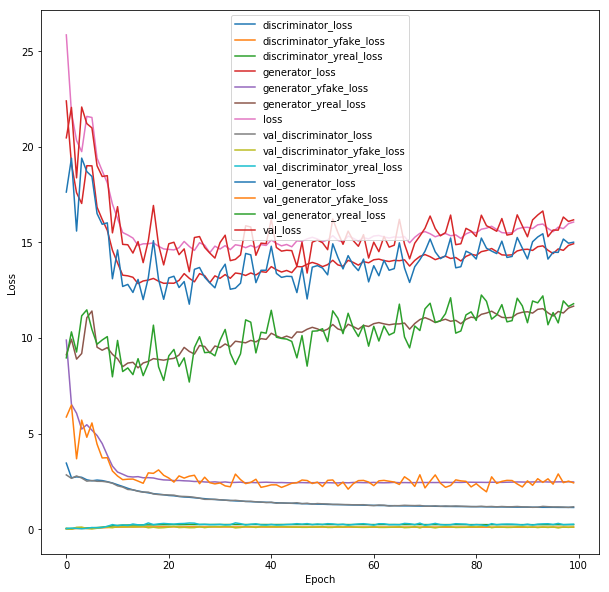

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(df['discriminator_loss'], label='discriminator_loss')
plt.plot(df['discriminator_yfake_loss'], label='discriminator_yfake_loss')
plt.plot(df['discriminator_yreal_loss'], label='discriminator_yreal_loss')
plt.plot(df['generator_loss'], label='generator_loss')
plt.plot(df['generator_yfake_loss'], label='generator_yfake_loss')
plt.plot(df['generator_yreal_loss'], label='generator_yreal_loss')
plt.plot(df['loss'], label='loss')
plt.plot(df['val_discriminator_loss'], label='val_discriminator_loss')
plt.plot(df['val_discriminator_yfake_loss'], label='val_discriminator_yfake_loss')
plt.plot(df['val_discriminator_yreal_loss'], label='val_discriminator_yreal_loss')
plt.plot(df['val_generator_loss'], label='val_generator_loss')
plt.plot(df['val_generator_yfake_loss'], label='val_generator_yfake_loss')
plt.plot(df['val_generator_yreal_loss'], label='val_generator_yreal_loss')
plt.plot(df['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Generated images - Epoch 0

<img src='output/gan/epoch-000.png' />

#### Generated images - Epoch 50

<img src='output/gan/epoch-050.png' />

#### Generated images - Epoch 99

<img src='output/gan/epoch-099.png' />

## References 

* [Denton et al. “_Deep Generative Image Models using a￼ Laplacian Pyramid of Adversarial Networks_” (NIPS 2015)](https://scholar.google.com/citations?citation_for_view=RJV6hA4AAAAJ%3A2osOgNQ5qMEC&hl=en&user=RJV6hA4AAAAJ&view_op=view_citation)
* [Radford et al. “_Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks_” (ICLR 2015)](https://scholar.google.com/citations?citation_for_view=36ofBJgAAAAJ%3AYsMSGLbcyi4C&hl=en&user=36ofBJgAAAAJ&view_op=view_citation)
* [Mathieu et al. “_Deep multi-scale video prediction beyond mean square error_”](https://scholar.google.com/citations?citation_for_view=SSTIBK0AAAAJ%3AW7OEmFMy1HYC&hl=en&sortby=pubdate&user=SSTIBK0AAAAJ&view_op=view_citation)